In [1]:
import math, pylab
import numpy as np
import pandas as pd
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr

## Data and sampling distributions

### Random sampling and sample bias

- **Sample** - subset from a larger dataset. Can sample with or without replacement

- **Population** - larger data set (or idea of larger set

- **N (n)** - size of the population (sample)

- **Random sampling** - drawing elements into a sample at random

- **Stratified sampling** - dividing the population into strata, sampling randomly from each strata

- **Simple random sample** - sample that results from random sampling without stratification

- **Sample bias** - sample that misrepresents population

#### Bias

Errors produced by the sampling or measurement process

Must distinguish between chance errors and bias errors

If there is a suggestion of bias, often some model has been misspecified, or a variable left out

#### Random selection

Takes time to do it right

#### When does size matter?

Size vs. quality trade-offs

#### Sample mean vs. population mean

$ \bar{x} $ is used to represent mean of a sample

$ \mu $ is used to represent mean of a population

- random sampling is important
- bias is errors because sampling was bad
- data quality is more important than quantity

### Selection bias

- **Bias** - systematic error

- **Data snooping** - hunting through data for something interesting

- **Vast search effort** - bias/nonreproducability from repeated modeling or modeling too many predictor variables

- **Target shuffling** - permutation test of the validity of predictive associations

#### Regression to the mean

Successive measurements, extreme observations are usually followed by more central ones

- to avoid bias: specify a hypothesis, collect data w/ randomization/random sampling principles
- everything else invites bias: repreated running of models in data mining, data snooping in research, and after-the-fact selection of interesting events

### Sampling distribution of a statistic

- **Sample statistic** - metric calculated for a sample

- **Data distribution** - frequency distribution of values in a data set

- **Sampling distribution** - frequency distribution of a sample statistic over many samples or resamples

- **Central limit theorem** - tendency of the sampling distribution to take on a normal shape as sample size rises

- **Standard error** - variability (standard deviation) of a sample statistic over many samples (as opposed to standard deviation, which measures variability of individual *values*)

The distribution of a sample statistic, like the mean, is likely to be more regular/bell-shaped than the distribution of the actual data.

The larger the sample that the statistic is based on, the more this is true.

And the larger the sample, the narrower the distribution of the sample statistic.

The graphs below show the data and three samples:
- a sample of 1,000 values
- a sample of 1,000 means of 5 values
- a sample of 1,000 means of 20 values

The histograms are increasingly compact.

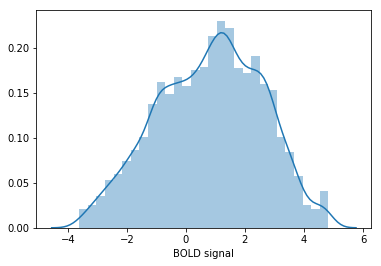

In [2]:
gammas = sns.load_dataset('gammas')
df = gammas.dropna(subset=['BOLD signal'])
sns.distplot(df['BOLD signal'])
# all data

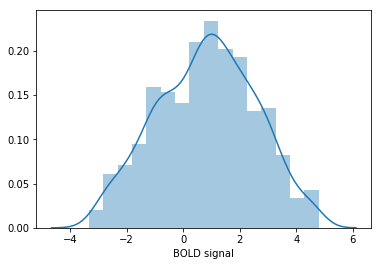

In [3]:
s = df.sample(n=1000, replace=True)
sns.distplot(s['BOLD signal'])
# all data random sample n=1000

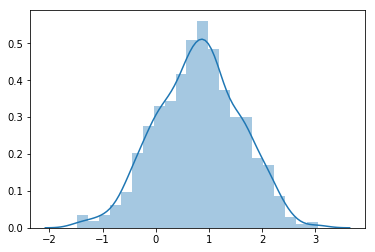

In [4]:
means_of_5 = [ df.sample(n=5)['BOLD signal'].mean() for _ in range(1000) ]
sns.distplot(means_of_5)
# sample of means of 5 values n=1000

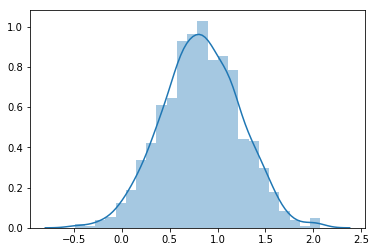

In [5]:
means_of_20 = [ df.sample(n=20)['BOLD signal'].mean() for _ in range(1000) ]
sns.distplot(means_of_20)
# sample of means of 20 values n=1000

#### Central limit theorem

Means drawn from multiple samples will start to resemble the normal distribution, even i the source population is not normally distributed, provided that the sample size is large enough and the departure of the data from normality is not too great.

Allows normal-approximation formulas like the t-distribution to be used in calculating sampling distributions for inference (i.e. confidence intervals and hypothesis tests).

Central limit theorem is important in traditional statistics, with lots of hypothesis tests and confidence intervals.

But it's less important in data science.

#### Standard error

Sums up the variability in the sampling distribution for a statistic.

### $ SE = \frac{s}{\sqrt{n}} $

In [6]:
#######
def mean(x):
    return sum(x) / len(x)

def variance(x, sample=True):
    sum_squared_deviations = sum([ (x[i] - mean(x))**2 for i in range(len(x)) ])
    denominator = (len(x) - 1) if sample else len(x)
    return sum_squared_deviations / denominator

def standard_deviation(x):
    return math.sqrt(variance(x))
#######

def standard_error(x):
    return standard_deviation(x) / math.sqrt(len(x))

standard_error([1,2,6])

1.5275252316519468

#### stats.sem()

In [7]:
stats.sem([1,2,6])

1.5275252316519468

*Square-root of n = rule*: in order to reduce the standard error by factor of 2, must increase sample size by factor of 4.

In modern statistics, the *bootstrap* resampling proess has become standard way to estimate standard error, as it doesn't have any distributional assumptions (as opposed to the central limit theorem which does).

- frequency distribution of sample statistic tells us how that metric would turn out differently, sample to sample
- sampling distribution can be estimated via the bootstrap, or via formulas relying on central limit theorem
- standard error is key metric summing up variability of a sample statistic

### The bootstrap

**Bootstrap sample** - sample taken with replacement from the observed data set

**Resampling** - taking repeated samples from data; both bootstrap and permutation/shuffling procedures

Basically replicating the first sample a thousand times over, so it's a hypothetical population embodying all the knowledge from the first sample, just larger.

Then drawing samples from this hypothetical population for purpose of estimating a sampling distribution.

In practice we simply sample with replacement.

- Take n samples with replacement
- Use n results to record statistic (e.g. mean)
- Repeat R times
- Use R results to:
 - calculate standard deviation
 - visualize histogram or boxplot
 - find a confidence interval
 

Mean 0    49.06629
dtype: float64
Standard deviation 0    9.150356
dtype: float64


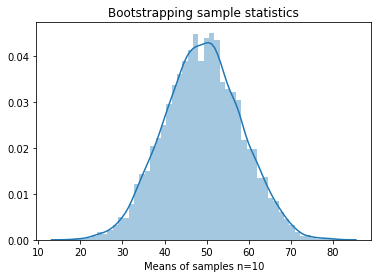

In [8]:
### Bootstrapping a sample statistic (mean)

data = pd.DataFrame(np.random.randint(100, size=1000))

R = 10000
n = 10

results = []
for _ in range(R):
    s = data.sample(n=n, replace=True)
    results.append(s.mean())

df = pd.DataFrame(results)

print('Mean', df.mean())
print('Standard deviation', df.std())

# histogram with seaborn
ax = sns.distplot(df)
plt.title('Bootstrapping sample statistics')
ax.set(xlabel='Means of samples n={}'.format(n))
plt.show()

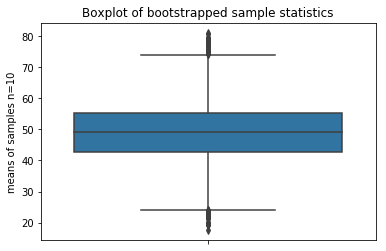

In [9]:
# boxplot with seaborn
ax = sns.boxplot(y=df[0])
plt.title('Boxplot of bootstrapped sample statistics'.format(n))
ax.set(ylabel='means of samples n={}'.format(n))
plt.show()

The bootstrap can be used with multivariate data, where whole rows are sampled as units

Classification and regression/decision trees, running multple trees on bootstrap samples and then averaging predictions (or taking a majority vote) is usually better than a single tree

This is called *bagging*, bootstrap aggregating

Note that bootstrap does NOT compensate for small sample size; just informs about how lots of additional samples would behave when drawn from a population like our original sample

Bootstrapping is sometimes referred to as resampling, but resampling usually includes permutations

- bootstrap is sampling with replacement to assess the variability of a sample statistic
- can be applied in variety of circumstances, without lots of math approximations of sampling distributions
- estimate sampling distributions for statistics where no mathematical approximation has been developed
- for predictive models, bagging preforms better than a single model

### Confidence intervals

- **Confidence level** - percentage of confidence intervals, constructed in the same way from the same population, expected to contain the statistic of interest

- **Interval endpoints** - top and bottom of the confidence interval

We often want to predict a range of numbers, not a single *point estimate*. 

Confidence intervals come with confidence levels - e.g. 90% - meaning "this is the interval enclosing the central 90% of the bootstrap sampling distribution of a sample statistic"

An *x%* confidence interval around a sample estimate should, on average, contain similar sample estimates *x%* of the time.



In [10]:
df = df.sort_values(by=0)
df_90_confidence_interval = pd.DataFrame(df[0].values[500:9500])

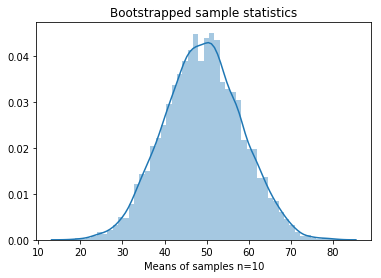

In [11]:
# data histogram with seaborn
ax = sns.distplot(df)
plt.title('Bootstrapped sample statistics')
ax.set(xlabel='Means of samples n={}'.format(n))
plt.show()

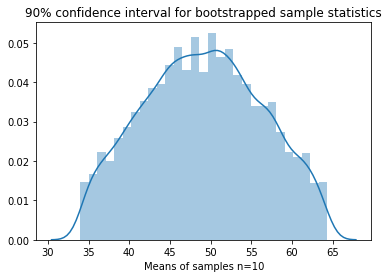

In [12]:
# confidedence interval histogram with seaborn
ax = sns.distplot(df_90_confidence_interval)
plt.title('90% confidence interval for bootstrapped sample statistics')
ax.set(xlabel='Means of samples n={}'.format(n))
plt.show()

Using our bootstrapped data set of R=10000 means of n=1000, selected from the population of N=100000

The first graph above shows the full bootstrap distribution

The second shows the 90% confidence interval

This means that 90% of the boostrap statistics were in this interval.

In [13]:
print(df_90_confidence_interval[0].max())
print(df_90_confidence_interval[0].min())

64.3
34.0


In [14]:
data.mean()

0    49.096
dtype: float64

The interval endpoints were 63.7 and 34.0.

This means that across ten thousand resamples, each of size 10, 90% of the time, the statistic we measured (the mean) was in the range of 63.7 and 34.0.

(The actual mean of the whole population is 48.629)

Can use confidence intervals to talk about the potential error in an estimate, or maybe learn if a bigger sample is needed.

- confidence intervals are the typical way to present estimates as an interval range
- the more data you have, the less variable the sample estimate will be
- the lower level of confidence you can tolerate, narrower the confidence level will be
- bootstrap is an effective way to construct confidence intervals

### Normal distribution

- **Error** - difference b/w datapoint and predicted value
- **Standardize/normalize** - subtract the mean, divide by the standard deviation (sd)
- **Z-score** - result of standardizing an individual data point
- **Standard normal** - normal distribution with mean = 0 and sd = 1
- **QQ-plot** - how close a sample distribution is to a normal distribution

Bell-shaped, iconic distribution

A powerful tool in approximating sample statistic distributions

In a normal distribution, 68% of data is within 1 sd of the mean, 95% is within 2 sd, 99.7% is within 3 sd

Also known as *Gaussian distribution*

NOTE: Assuming statistic is normally distributed is a last result, if you can't use bootstrap distributions or other options

#### numpy.random.normal()

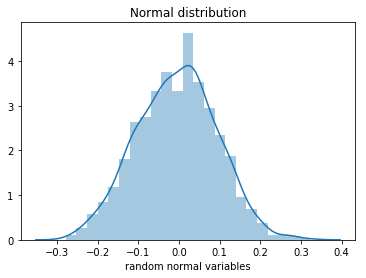

In [15]:
### simulating random variables from a normal distribution 
### w/ numpy.random.normal()

mu, sigma = 0.0, 0.1
s = np.random.normal(loc=mu, scale=sigma, size=1000)

# histogram with seaborn
ax = sns.distplot(s)
plt.title('Normal distribution')
ax.set(xlabel='random normal variables')
plt.show()

#### numpy.random.standard_normal()

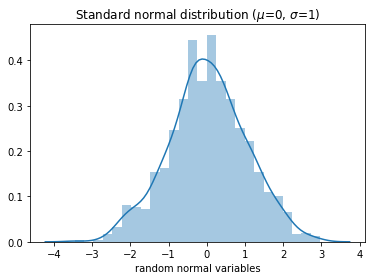

In [16]:
### simulating random variables from a standard normal distribution 
### w/ numpy.random.standard_normal()

s = np.random.standard_normal(size=1000)

# histogram with seaborn
ax = sns.distplot(s)
plt.title('Standard normal distribution ($\mu$=0, $\sigma$=1)')
ax.set(xlabel='random normal variables')
plt.show()

#### stats.norm.pdf()

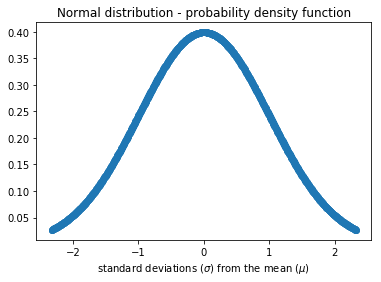

In [17]:
### probability density function with stats.norm.pdf()
### (density of a continuous random variable)

### Continuous probability distributions also known as probability
### density functions, they are functions that take on continuous
### values (e.g. values on the real line). Examples include the
### normal distribution, the exponential distribution and the beta
### distribution.

x = np.linspace(stats.norm.ppf(0.01),
                stats.norm.ppf(0.99), 1000)

y = stats.norm.pdf(x)

## plot with matplotlib
plt.plot(x, y, 'o-')
plt.title('Normal distribution - probability density function')
plt.xlabel('standard deviations ($\sigma$) from the mean ($\mu$)')
plt.show()

#### stats.norm.rvs()

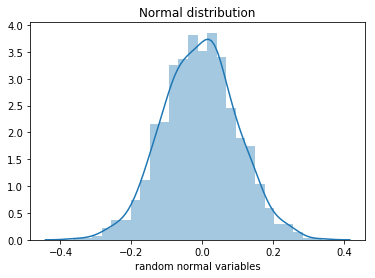

In [18]:
### simulating random variables from a normal distribution 
### w/ stats.norm.rvs()

mu, sigma = 0.0, 0.1
s = stats.norm.rvs(loc=mu, scale=sigma, size=1000)

# histogram with seaborn
ax = sns.distplot(s)
plt.title('Normal distribution')
ax.set(xlabel='random normal variables')
plt.show()

#### Z-scores

Standardized data - subtract the mean and divide by standard deviation.

Expressed as units of standard deviations from the mean.

In [19]:
### calculate z-scores for a list

def z_scores(x):
    mean_x = mean(x)
    std_x = standard_deviation(x)
    return [(x_i - mean_x) / std_x for x_i in x]

z_scores(df[0].values)[:5]

[-3.4497336102512639,
 -3.2530199483526907,
 -3.2530199483526907,
 -3.1765201909476906,
 -3.1765201909476906]

9909   -3.449734
5177   -3.253020
7953   -3.253020
7205   -3.176520
7336   -3.176520
Name: col_zscore, dtype: float64


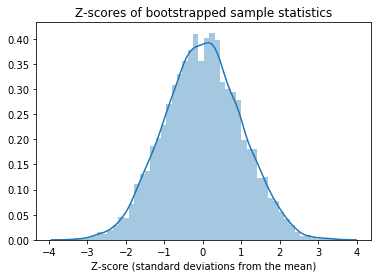

In [20]:
### z-scores with pandas

df['col_zscore'] = (df[0] - df[0].mean())/df[0].std()

print(df['col_zscore'].head(5))

ax = sns.distplot(df['col_zscore'])
plt.title('Z-scores of bootstrapped sample statistics')
ax.set(xlabel='Z-score (standard deviations from the mean)')
plt.show()

#### QQ-plots

QQ-plot determines how close a smaple is to the normal distribution.

Z-score goes on the y-axis, and corresponding quantiles of a normal distribution are on x-axis.

A 45-degree line is drawn down the middle.

IF the points fall roughly on this line, then the sample distribution can be considered close to normal.

#### stats.probplot()

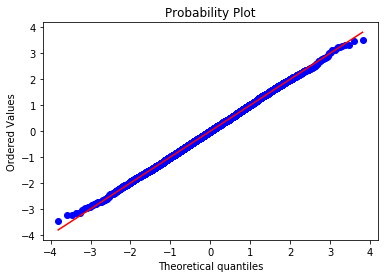

In [21]:
# QQ-plot with stats.probplot() and pylab
stats.probplot(df['col_zscore'], dist="norm", plot=pylab)
pylab.show()

Based on this we can expect a normal distribution for our sample statistic (R=10000 means of samples of n=1000).

And, we see one.

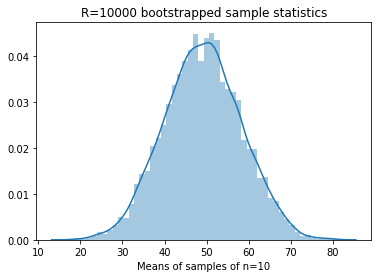

In [22]:
# histogram with seaborn
ax = sns.distplot(df[0])
plt.title('R=10000 bootstrapped sample statistics')
ax.set(xlabel='Means of samples of n=10')
plt.show()

- Normal distribution permits approzimation of uncertainty and variability
- Raw data is typically not normally distributed, *errors* are, as are averages and totals in large samples.
- To convert data to z-scores, subtract the mean of the data and divide by the standard deviation. You can then compare to a normal distribution.

### Long-tailed distributions

- **Tail** - long narrow portion of a frequency distribution, where relatively extreme values occur at low frequency

- **Skew** - where one tail of a distribution is longer than the other

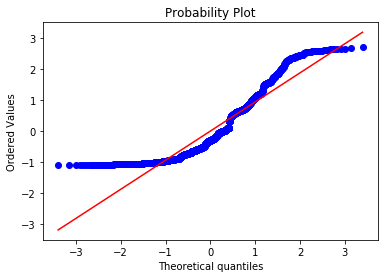

In [23]:
nflx = pdr.get_data_yahoo('NFLX')
nflx_close_z_scores = z_scores(nflx['Close'])
stats.probplot(nflx_close_z_scores, dist="norm", plot=pylab)
pylab.show()

Based on this we DON'T expect a normal distribution for our statistic (daily closes of Netflix).

And, we don't see one.

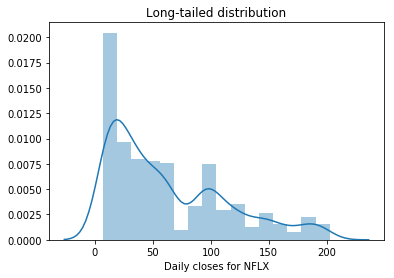

In [24]:
# histogram with seaborn
ax = sns.distplot(nflx['Close'])
plt.title('Long-tailed distribution')
ax.set(xlabel='Daily closes for NFLX')
plt.show()

- most data is not normally distributed
- assuming normal distribution leads to underestimation of extreme events ("black swans")

### Student's t-distribution

Normally-shaped distribution, but thicker and longer on the tails

Used extensivly in depicting distributions of sample statistics

- **n** - sample size

- **degrees of freedom** - allows t-distribution to adjust to different sample sizes, statistics, and number of groups

A number of different statistics can be compared, after normalization, to the t-distribution, to estimate confidence intervals in light of sampling variation

*Degrees of freedom* "chops off" n% of the t-distribution at either end

E.g. if $n$ = sample size, $\bar{x}$ = sample mean, $s$ = sample standard deviation, and $t$ = t-statistic a 90% confidence interval around the sample mean is given by:

### $ \bar{x} \pm t_{n - 1} (.05) \times \frac{s}{n} $

#### numpy.random.standard_t()

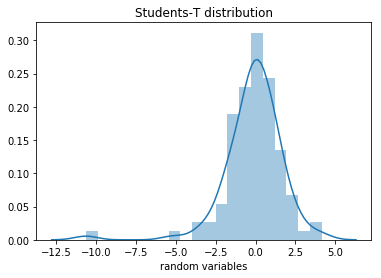

In [25]:
### simulating random variables from a Students-T distribution 
### w/ numpy.random.standard_t()

degrees_freedom = 3

s = np.random.standard_t(degrees_freedom, size=100)

# histogram with seaborn
ax = sns.distplot(s)
plt.title('Students-T distribution')
ax.set(xlabel='random variables')
plt.show()

#### stats.t.pdf()

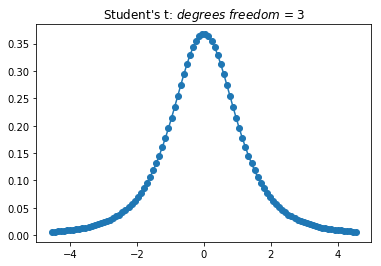

In [26]:
### probability density function with stats.t.pdf()
### (density of a continuous random variable)

x = np.linspace(stats.t.ppf(0.01, degrees_freedom),
                stats.t.ppf(0.99, degrees_freedom), 100)

y = stats.t.pdf(x, degrees_freedom)

## plot with matplotlib
plt.plot(x, y, 'o-')
plt.title('Student\'s t: $degrees\ freedom$ = {}'.format(degrees_freedom))
plt.show()

#### stats.t.rvs()

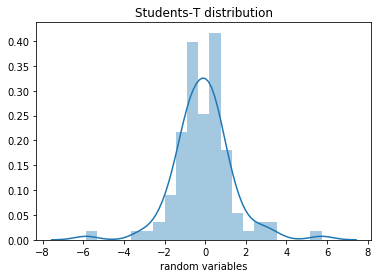

In [27]:
### simulating random variables from a Students-T distribution 
### w/ stats.t.rvs()

s = stats.t.rvs(degrees_freedom, size=100)

# histogram with seaborn
ax = sns.distplot(s)
plt.title('Students-T distribution')
ax.set(xlabel='random variables')
plt.show()

- t-distribution is actually a family of distributions resembling the normal distribution, but with thicker tails
- widely used as reference basis for the distribution of sample means, differences b/w two sample means, regression parameters, and more

### Binormial distributions

- **Trial** - event with discrete outcome (e.g. coin flip)

- **Success** - outcome of interest for a trial - aka 1, not 0

- **Binomial** - having only 2 outcomes - aka binary, t/f, y/n, 0/1

- **Binomial trial** - a trial with 2 outcomes - aka bernoulli trial

- **Binomial distribution** - distribution of successes in x trials - aka bernoulli distribution

Binomial distribution is the frequency distribution of number of successes ($x$) in a given number of trials ($n$) with specified probability ($p$) of success in each trial

There is a family of binomial distributions, depending on values of $x$, $n$, and $p$

#### numpy.random.binomial()

In [28]:
### simulating random variables from a Binomial distribution
### w/ numpy.random.binomial()

n, p = 10, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, 1000)

print('Mean', np.mean(s))
print('Sd', np.std(s, ddof=1))

Mean 5.084
Sd 1.56697140989


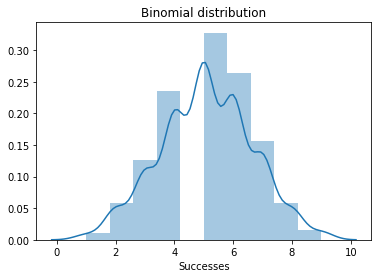

In [29]:
# histogram with seaborn
ax = sns.distplot(s, bins=10, norm_hist=True)
plt.title('Binomial distribution')
ax.set(xlabel='Successes')
plt.show()

#### stats.binom.pmf()

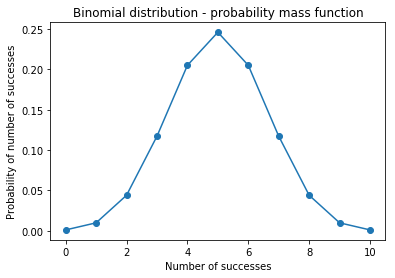

In [30]:
### probability mass function for Binomial distribution
### w/ stats.binom.pmf()
### (probability that a discrete random variable is exactly equal to some value)

### Discrete probability distributions are also called as 
### probability mass functions. Some examples of discrete 
### probability distributions are Bernoulli distribution,
### Binomial distribution, Poisson distribution and 
### Geometric distribution.

n, p = 10, .5  # number of trials, probability of each trial
x = np.arange(0, n+1)
y = stats.binom.pmf(x, n, p)

## plot with matplotlib
plt.plot(x, y, 'o-')
plt.title('Binomial distribution - probability mass function')
plt.xlabel('Number of successes')
plt.ylabel('Probability of number of successes')
plt.show()

#### stats.binom.rvs()

In [31]:
### simulating random variables from a Binomial distribution 
### w/ stats.binom.rvs()

n, p = 10, .5  # number of trials, probability of each trial
x = stats.binom.rvs(n=n, p=p, size=1000)

print('Mean', np.mean(x))
print('Sd', np.std(x, ddof=1))

Mean 5.065
Sd 1.53790121274


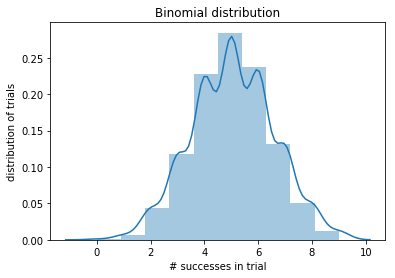

In [32]:
# histogram with seaborn
ax = sns.distplot(x, bins=10, norm_hist=True)
plt.title('Binomial distribution')
ax.set(xlabel='# successes in trial', ylabel='distribution of trials')
plt.show()

- binomial outcomes are important since they represent fundamental decisions (do it or don't do it, did it or didn't do it)
- binomial trial is an experiment w/ 2 possible outcomes: 1 with probability $p$, the other with probability $1 - p$
- with large $n$, and provided $p$ is not too close to 0 or 1, binomial distribution can be approximated by the normal distribution

### Poisson and related distributions

- **Lambda** - rate at which events occur. per unit of time/space

- **Poisson distribution** - frequency distribution of # of events in sampled units of time/space

- **Exponential distribution** - frequency distribution of time/space from 1 event to the next

- **Weibull distribution** - generalized version of exponential, where event rate allowed to shift over time

#### Poisson distributions

$\lambda$, or lambda, is key parameter - the mean number of events taht occurs in a specified time/space interval

"How much capacity do we need to be 95% sure of fully covering any 5-second period"

#### numpy.random.poisson()

In [33]:
### simulating random variables from a Poisson distribution
### w/ numpy.random.poisson()

LAMBDA_RATE = 2

x = np.random.poisson(lam=LAMBDA_RATE, size=1000)

print('Mean', np.mean(x))
print('Sd', np.std(x, ddof=1))

Mean 1.983
Sd 1.39737742348


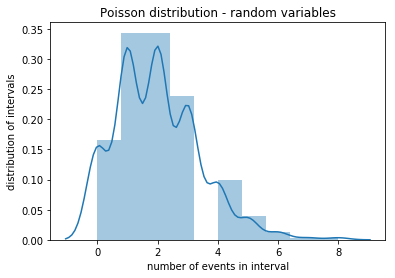

In [34]:
# histogram with seaborn
ax = sns.distplot(x, bins=10, norm_hist=True)
plt.title('Poisson distribution - random variables')
ax.set(xlabel='number of events in interval', ylabel='distribution of intervals')
plt.show()

#### stats.poisson.pmf()

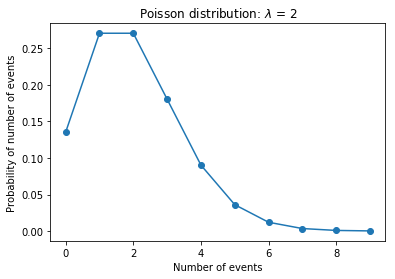

In [35]:
### probability mass function with stats.poisson.pmf()
### (probability that a discrete random variable is exactly equal to some value)

n = np.arange(0, 10)
y = stats.poisson.pmf(n, LAMBDA_RATE)

# plot with matplotlib
plt.plot(n, y, 'o-')
plt.title('Poisson distribution: $\lambda$ = {}'.format(LAMBDA_RATE))
plt.xlabel('Number of events')
plt.ylabel('Probability of number of events')
plt.show()

#### stats.poisson.rvs()

In [36]:
### simulating random variables from a Poisson distribution 
### w/ stats.poisson.rvs()

x = stats.poisson.rvs(mu=LAMBDA_RATE, loc=0, size=1000)
# e.g. simulate 1000 events, where the avg. rate of events is 2 per unit of space/time

print('Mean', np.mean(x))
print('Sd', np.std(x, ddof=1))

Mean 1.942
Sd 1.38584146155


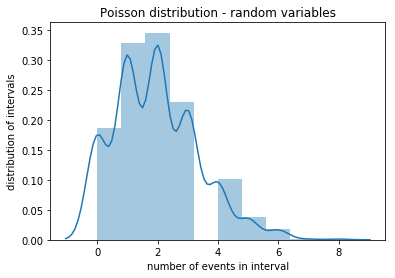

In [37]:
# histogram with seaborn
ax = sns.distplot(x, bins=10, norm_hist=True)
plt.title('Poisson distribution - random variables')
ax.set(xlabel='number of events in interval', ylabel='distribution of intervals')
plt.show()

### Exponential distribution

Using same $\lambda$ parameter, we can model time between events.

#### numpy.random.exponential()

In [38]:
### simulating random variables from an exponential distribution
### w/ numpy.random.exponential()

x = np.random.exponential(scale=LAMBDA_RATE, size=1000)
# e.g. simulate 1000 intervals between events, where the avg. rate of events is 2

print('Mean', np.mean(x))
print('Sd', np.std(x, ddof=1))

Mean 2.01770875227
Sd 2.17764782085


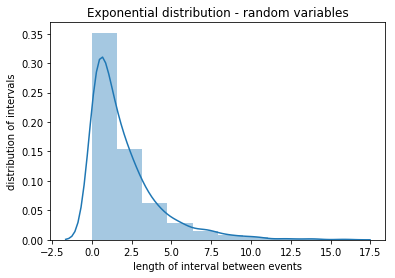

In [39]:
# histogram with seaborn
ax = sns.distplot(x, bins=10, norm_hist=True)
plt.title('Exponential distribution - random variables')
ax.set(xlabel='length of interval between events', ylabel='distribution of intervals')
plt.show()

#### stats.expon.pdf()

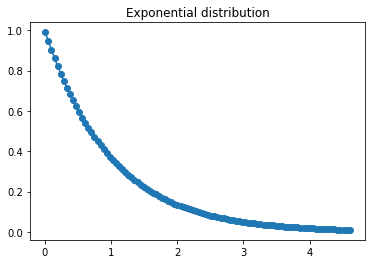

In [40]:
### probability density function with stats.expon.pdf()
### (density of a continuous random variable)

x = np.linspace(stats.expon.ppf(0.01),
                stats.expon.ppf(0.99), 100)

y = stats.expon.pdf(x)

## plot with matplotlib
plt.plot(x, y, 'o-')
plt.title('Exponential distribution')
plt.show()

#### stats.expon.rvs()

In [41]:
### simulating random variables from a exponential distribution 
### w/ stats.expon.rvs()

x = stats.expon.rvs(loc=0, scale=LAMBDA_RATE, size=1000)
# e.g. simulate 1000 intervals between events, where the avg. rate of events is 2

print('Mean', np.mean(x))
print('Sd', np.std(x, ddof=1))

Mean 2.01925813821
Sd 2.06419879411


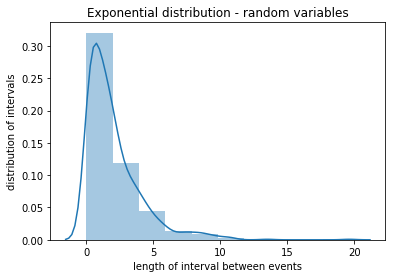

In [42]:
# histogram with seaborn
ax = sns.distplot(x, bins=10, norm_hist=True)
plt.title('Exponential distribution - random variables')
ax.set(xlabel='length of interval between events', ylabel='distribution of intervals')
plt.show()

#### Estimating the failure rate

How do you know the event rate of rare events?

Assess different hypothetical event rates and estimate threshold values below which the rate is very unlikely to fall

#### Weibull distribution

Often event rate/lambda does not stay constant over time

*Shape paramter* spoecifies how the event rate changes over time

If it's >1, the event becomes more likely. If it's <1, the event becomes less likely.

#### numpy.random.weibull()

In [43]:
c = 1.79 # shape

x = np.random.weibull(c, 1000)

print('Mean', np.mean(x))
print('Sd', np.std(x, ddof=1))

Mean 0.885555628323
Sd 0.522251124189


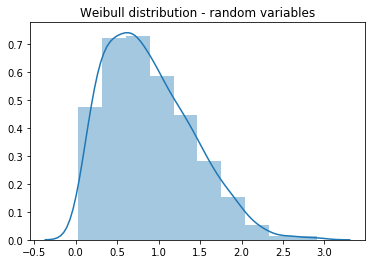

In [44]:
# histogram with seaborn
ax = sns.distplot(x, bins=10, norm_hist=True)
plt.title('Weibull distribution - random variables')
# ax.set(xlabel='length of interval between events', ylabel='distribution of intervals')
plt.show()

#### stats.weibull_min.pdf()

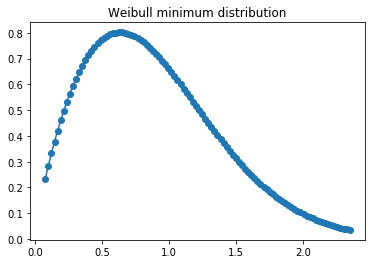

In [45]:
c = 1.79

x = np.linspace(stats.weibull_min.ppf(0.01, c),
                stats.weibull_min.ppf(0.99, c), 100)

y = stats.weibull_min.pdf(x, c)

## plot with matplotlib
plt.plot(x, y, 'o-')
plt.title('Weibull minimum distribution')
plt.show()

#### stats.weibull_max.pdf()

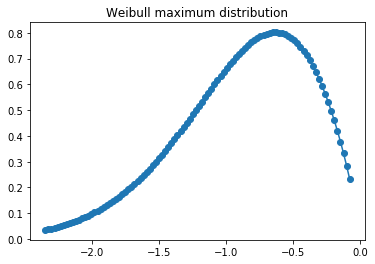

In [46]:
x = np.linspace(stats.weibull_max.ppf(0.01, c),
                stats.weibull_max.ppf(0.99, c), 100)

y = stats.weibull_max.pdf(x, c)

## plot with matplotlib
plt.plot(x, y, 'o-')
plt.title('Weibull maximum distribution')
plt.show()

#### stats.weibull_min.rvs()

In [47]:
### simulating random variables from a exponential distribution 
### w/ stats.weibull_min.rvs()

x = stats.weibull_min.rvs(c, size=1000)

print('Mean', np.mean(x))
print('Sd', np.std(x, ddof=1))

Mean 0.904123172085
Sd 0.526505389881


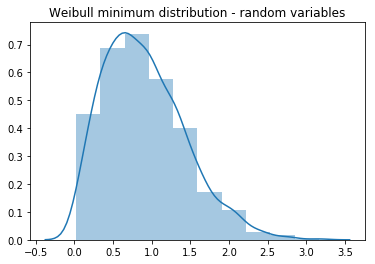

In [48]:
# histogram with seaborn
ax = sns.distplot(x, bins=10, norm_hist=True)
plt.title('Weibull minimum distribution - random variables')
# ax.set(xlabel='length of interval between events', ylabel='distribution of intervals')
plt.show()

#### stats.weibull_max.rvs()

In [49]:
### simulating random variables from a exponential distribution 
### w/ stats.weibull_max.rvs()

x = stats.weibull_max.rvs(c, size=1000)

print('Mean', np.mean(x))
print('Sd', np.std(x, ddof=1))

Mean -0.88615287519
Sd 0.522509008637


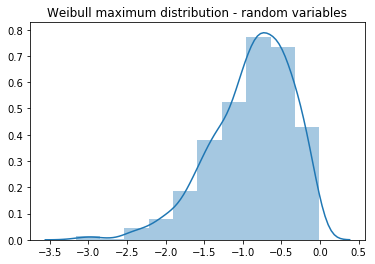

In [50]:
# histogram with seaborn
ax = sns.distplot(x, bins=10, norm_hist=True)
plt.title('Weibull maximum distribution - random variables')
# ax.set(xlabel='length of interval between events', ylabel='distribution of intervals')
plt.show()

- for events occuring at a constant rate, number of events per unit of space/time can be modeled as Poisson distribution
- can model space/time between 1 event and the next as exponential distribution
- changing event rate over time can be modeled with Weinbull distribution